In [153]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#  *****************************************
1. Load the data you receive into a Pandas DataFrame.
2. Show the first five rows of the data set.
3. Show the description and the info of the data set.
4. Ensure that any date columns have been cast into a datetime object in your DataFrame.
5. Using a regression model, split your data into train and test data.
6. Fit your training split to the regression model.
7. Show your regression model’s score.
8. Draw at least three conclusions from your regression model.
9. Your notebook should be clutter free and polished.
# **************************************


#### Load the data you receive into a Pandas DataFrame.
#### Show the first five rows of the data set.

In [154]:
data = pd.read_csv("worldwide_happiness_report.csv") 
# Preview the first 5 lines of the loaded data 
data.head(5)
# type(data)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### 3. Show the description and the info of the data set.


In [155]:
data.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


#### Ensure that any date columns have been cast into a datetime object in your DataFrame.

In [156]:
data.info(verbose=None, buf=None, max_cols=None, memory_usage=None, null_counts=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


5. Using a regression model, split your data into train and test data.
6. Fit your training split to the regression model.
7. Show your regression model’s score.

In [157]:
x=data['Freedom to make life choices'].values
y=data['Social support'].values
x=x.reshape(-1,1)


In [158]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2 ,random_state=100)


In [159]:
x_train.shape


(124, 1)

In [160]:
x_test.shape

(32, 1)

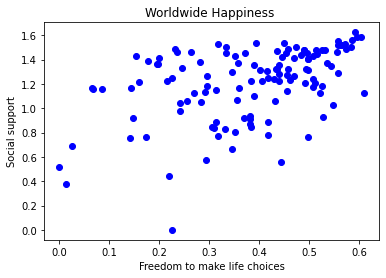

In [161]:
%matplotlib inline
plt.scatter(x_train, y_train, color='blue')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Social support')
plt.title('Worldwide Happiness ')
plt.show()

In [162]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [163]:
y_predict = model.predict(x_test) # Trained my model

In [164]:
y_predict


array([1.31021814, 1.37716599, 1.31506943, 1.33641512, 1.15303625,
       1.37813624, 1.16953064, 1.41015478, 1.17438193, 1.37619573,
       1.21416254, 1.13751211, 1.35485004, 1.1869953 , 1.25394314,
       1.0414565 , 1.11810693, 1.44799487, 1.23356771, 1.19669788,
       1.31603969, 1.34320693, 1.24909185, 1.18602504, 1.29275349,
       0.84546426, 1.37425521, 1.41597633, 1.37425521, 1.17632245,
       0.99779487, 1.32865306])

In [165]:
y_test


array([1.232, 1.441, 0.986, 1.553, 1.105, 0.698, 1.033, 1.573, 0.437,
       1.409, 1.439, 1.513, 1.269, 1.484, 0.983, 1.212, 1.515, 1.529,
       1.508, 0.799, 1.528, 1.465, 1.111, 1.114, 1.432, 0.575, 0.711,
       1.31 , 1.313, 1.147, 1.   , 1.438])

In [166]:
print(f'Testing Accuracy:')
model.score(x_test, y_test)*100

Testing Accuracy:


12.445375620342435

In [167]:
print(f'Training Accuracy: ')
model.score(x_train, y_train)*100

Training Accuracy: 


21.98706909560244

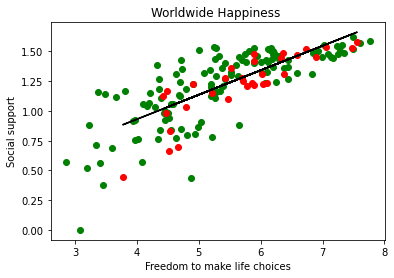

In [176]:
%matplotlib inline
plt.scatter(x_train, y_train, color='green')
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_predict, color='black')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Social support')
plt.title('Worldwide Happiness ')
plt.show()

#### Draw at least three conclusions from your regression model.
i tried  to find the relationship  between social support and  Freedom to make life choices  and testing on 20% of data  and show that 
the Accuracy it's equal to 12% 
so people will not let you feel freedom in your life so it's not your life  alone  but it life for all so the happiness will not affected  :)
and test another values like Score and social support and get acc equal to 67.54908088849658


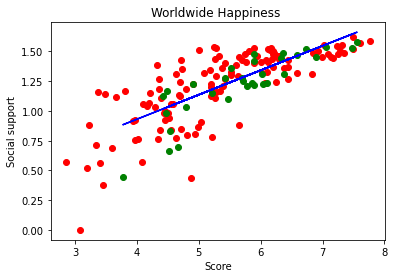

In [181]:
x=data['Score'].values
y=data['Social support'].values
x=x.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2 ,random_state=80)
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test) # Trained my model
%matplotlib inline
plt.scatter(x_train, y_train, color='red')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_test, y_predict, color='blue')
plt.xlabel('Score')
plt.ylabel('Social support')
plt.title('Worldwide Happiness ')
plt.show()

In [172]:
print(f'Testing Accuracy:')
model.score(x_test, y_test)*100

Testing Accuracy:


67.54908088849658